In [2]:
%autosave 30
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Autosaving every 30 seconds


# Data Analysis

## Data pre-processing

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("drug_consumption.data", sep=",", index_col = 0, header=None)

In [4]:
data

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0


On voit que le dataset n'est pas très propre, chargeons le à nouveau en nommant les colonnes grâce aux informations fournies
cette fois-ci

In [5]:
dataset = pd.read_csv("drug_consumption.data", sep=",", index_col = 0, header=None, names = ["Age", "Gender", "Education level", "Country", "Ethnicity", "NScore", "EScore", "OScore", "AScore", "CScore", "Impulsive", "Sensation seeing", "Alcohol", "Amphetamines", "Amyl nitrite", "Benzodiazepine", "Caffeine", "Cannabis", "Chocolate", "Cocaine", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legal highs", "LSD", "Methadone", "Mushrooms", "Nicotine", "Semeron", "Volatile Substances"])
dataset

,Age,Gender,Education level,Country,Ethnicity,NScore,EScore,OScore,AScore,CScore,...,Ecstasy,Heroin,Ketamine,Legal highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,Volatile Substances
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [6]:
dataset['Age']=dataset['Age'].map(lambda x:"18-24" if x<-0.5 else ("25-34" if x<0 else("35-44" if x<0.5 else("45-54" if x<1.5 else("55-64" if x<2 else "65+")))))
dataset

,Age,Gender,Education level,Country,Ethnicity,NScore,EScore,OScore,AScore,CScore,...,Ecstasy,Heroin,Ketamine,Legal highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,Volatile Substances
1,35-44,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,25-34,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,35-44,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,18-24,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,35-44,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,18-24,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1885,18-24,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1886,25-34,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1887,18-24,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [7]:
dataset['Gender']=dataset['Gender'].map(lambda x:"H" if x<0 else "F")
dataset

,Age,Gender,Education level,Country,Ethnicity,NScore,EScore,OScore,AScore,CScore,...,Ecstasy,Heroin,Ketamine,Legal highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,Volatile Substances
1,35-44,F,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,25-34,H,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,35-44,H,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,18-24,F,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,35-44,F,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,18-24,F,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1885,18-24,H,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1886,25-34,F,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1887,18-24,F,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [8]:
dataset['Education level']=dataset['Education level'].map(lambda x:"No degree" if x<-0.5 
                                                          else ("Professional certificate" if x<0 
                                                                else("University degree" if x<0.5 
                                                                     else("Masters degree" if x<1.5 
                                                                        else "Doctorate degree"))))
dataset

,Age,Gender,Education level,Country,Ethnicity,NScore,EScore,OScore,AScore,CScore,...,Ecstasy,Heroin,Ketamine,Legal highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,Volatile Substances
1,35-44,F,Professional certificate,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,25-34,H,Doctorate degree,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,35-44,H,Professional certificate,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,18-24,F,Masters degree,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,35-44,F,Doctorate degree,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,18-24,F,No degree,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1885,18-24,H,No degree,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1886,25-34,F,University degree,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1887,18-24,F,No degree,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [9]:
dataset['Country']=dataset['Country'].map(lambda x:"USA" if x<-0.5 
                                          else ("New Zealand" if x<-0.4 
                                                else("Other" if x<-0.2 
                                                     else("Australia" if x<0 
                                                          else("Ireland" if x<0.22 
                                                               else("Canada" if x<0.25 
                                                                    else "UK"))))))
dataset

,Age,Gender,Education level,Country,Ethnicity,NScore,EScore,OScore,AScore,CScore,...,Ecstasy,Heroin,Ketamine,Legal highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,Volatile Substances
1,35-44,F,Professional certificate,UK,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,25-34,H,Doctorate degree,UK,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,35-44,H,Professional certificate,UK,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,18-24,F,Masters degree,UK,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,35-44,F,Doctorate degree,UK,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,18-24,F,No degree,USA,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1885,18-24,H,No degree,USA,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1886,25-34,F,University degree,USA,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1887,18-24,F,No degree,USA,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


As we are in France, and here ethcnical statistics are forbidden, we will drop this column out.

In [10]:
dataset = dataset.drop('Ethnicity', axis='columns')

Then comes scores that evaluate different aspects of the personnality of each subject. They represent the subject's Big Five personality traits :
* Neuroticism (nervous vs. confident)
* Extraversion (energetic vs. reserved)
* Openness (curious vs. cautious)
* Agreeableness (friendly vs. challenging)
* Conscientiousness (organized vs. careless)

All those scores are taken from a questionnaire filled by the participants that aims at determining their personnality.
The score in each category has been scaled so that each variable has a normal distribution.

Then, comes the two scores that measure the impulsiveness and the sensation seeing of the subjects. They are also scaled.

And finally, there is 19 columns that treats the consumption of various products such as illegal drugs (cocaine, heroin, crack, ...), legal drugs (alcohol, nicotine, ...) and other products like chocolate or Semeron, a fictitious drug to test the overclaimers.
The consumption of each drug has been quantified as following :
* CL0 : Never used
* CL1 : Used over a decade ago
* CL2 : Used in last decade
* CL3 : Used in last year
* CL4 : Used in last month
* CL5 : Used in last week
* CL6 : Used in last day

In [11]:
dataset.iloc[:,12:31]

,Amphetamines,Amyl nitrite,Benzodiazepine,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legal highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,Volatile Substances
1,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1885,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1886,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1887,CL0,CL0,CL0,CL6,CL6,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


## Data visualisation

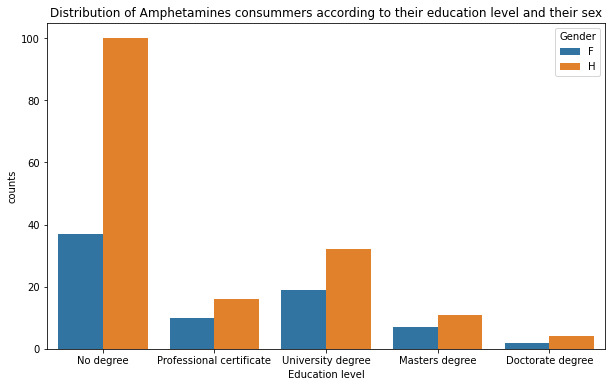

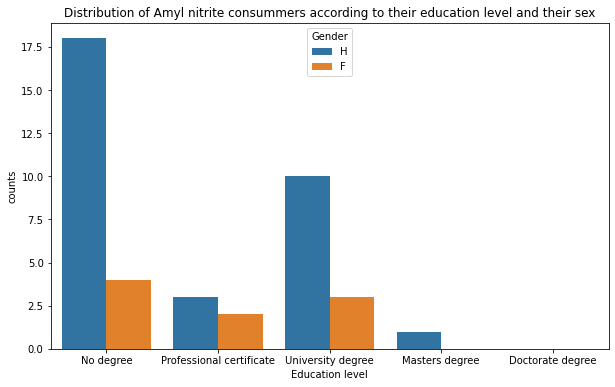

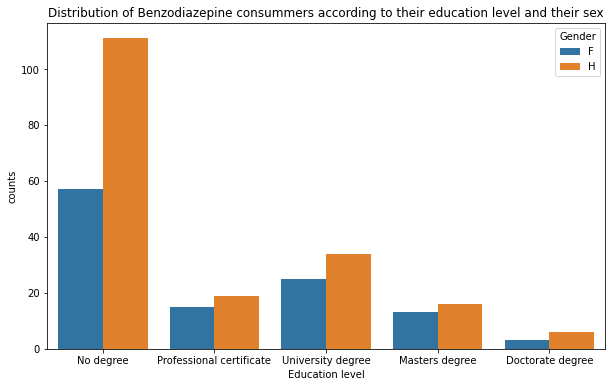

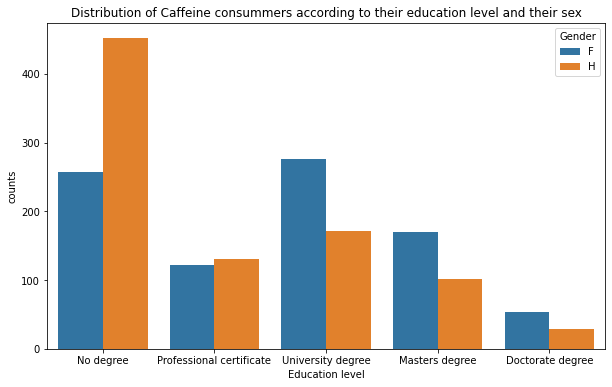

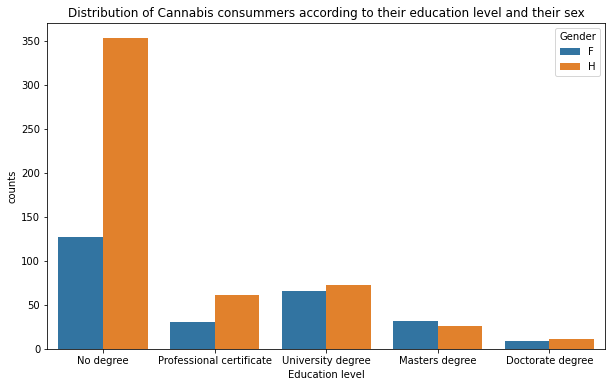

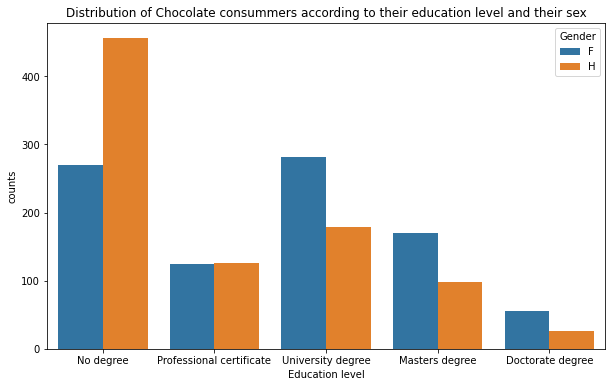

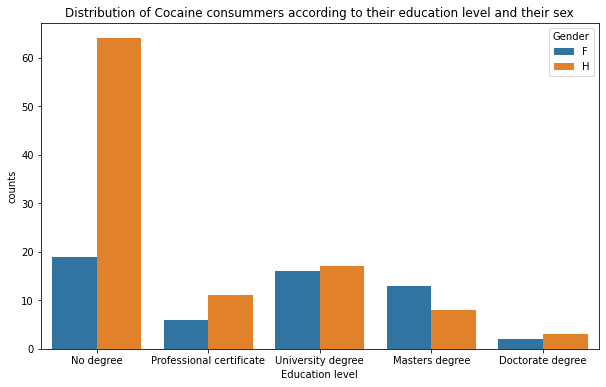

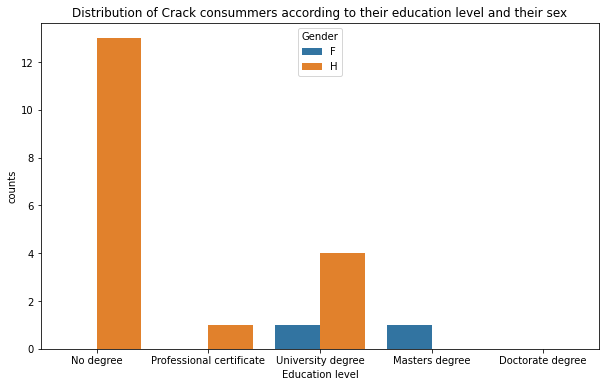

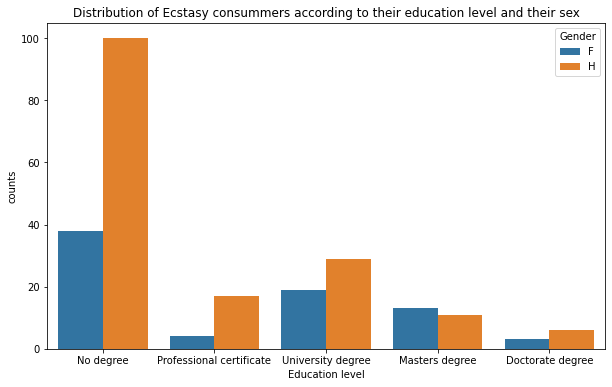

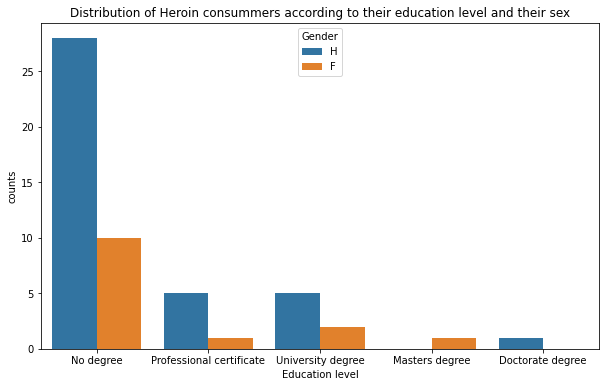

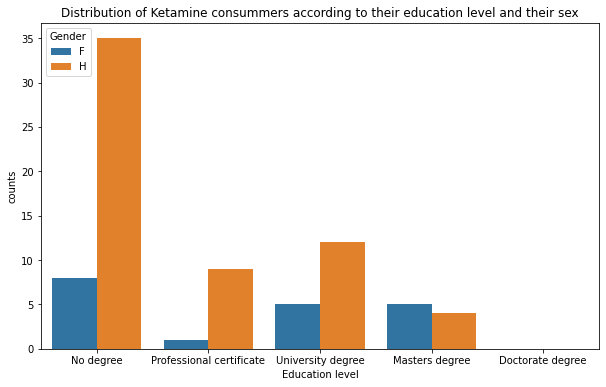

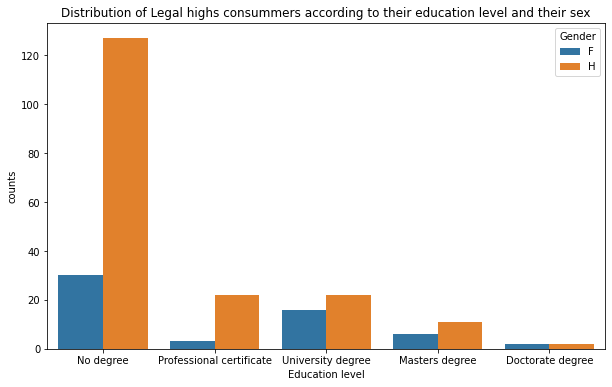

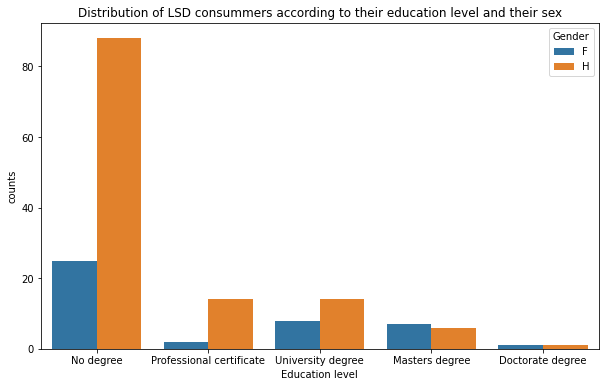

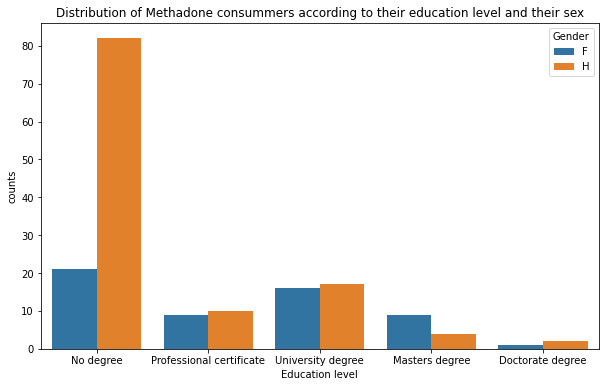

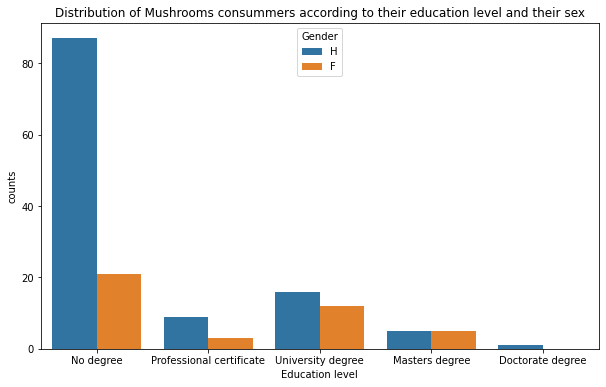

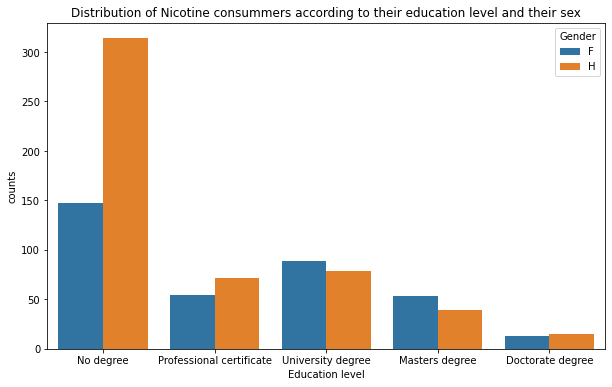

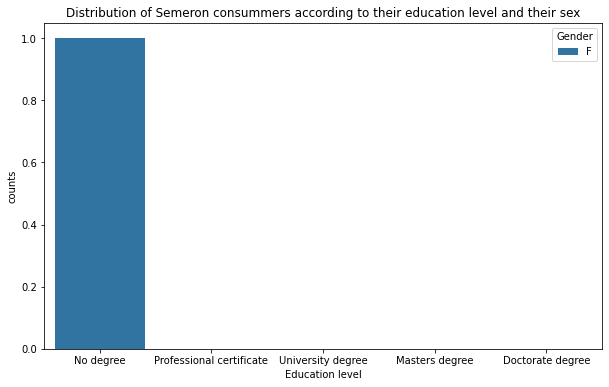

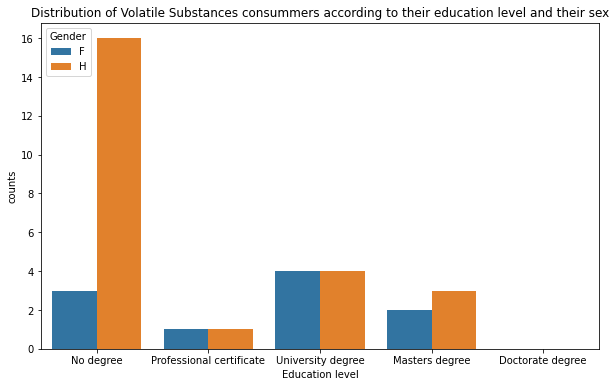

In [12]:
for substance in dataset.iloc[:,12:31].columns.tolist():
    sub_add = dataset[dataset[substance].isin(["CL6", "CL5", "CL4"])]
    subs_plot = sub_add.groupby(['Education level', 'Gender']).size().reset_index(name='counts')
    plt.rcParams['figure.figsize'] = [10, 6]
    sns.barplot(x='Education level', y='counts', hue='Gender', data=subs_plot,
                order=("No degree", "Professional certificate", "University degree", "Masters degree", "Doctorate degree")).set_title(f"Distribution of {substance} consummers according to their education level and their sex")
    plt.show()

We see here that with every drug, the category that is the most likely to be addicted is the one who has no degree. Furthermore, with every drug except one, the men in this category are more likely to be addicted than the women.

Let's consider that these data actually represents the countries. We'll try to use it to estimate the number of drug consumers in each country.

In [13]:
data_country = dataset[dataset["Country"]!="Other"]
total_pop = {"Australia" : 23820000, "Canada" : 35700000, "Ireland" : 4678000,
             "New Zealand" : 4596000, "UK" : 64850000, "USA" : 320700000}
pop_multiplicator = dict(total_pop)
for country in total_pop.keys():
    pop_multiplicator[country] /= dict(data_country.groupby('Country').size())[country]

Here, we computed a dictionnary with coefficients for each country so that are data are representative of the whole population of each country, taken the population for said country from 2015.

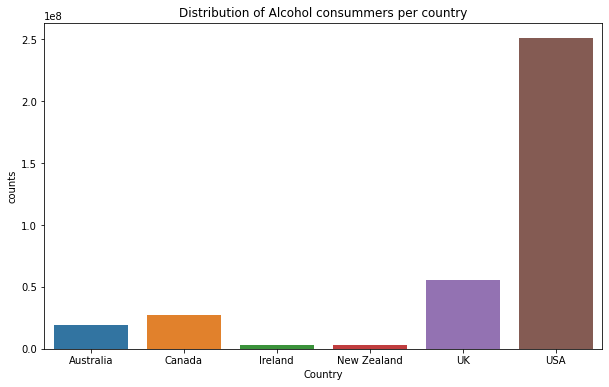

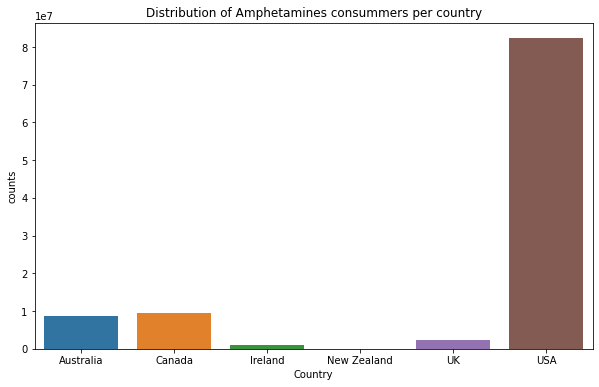

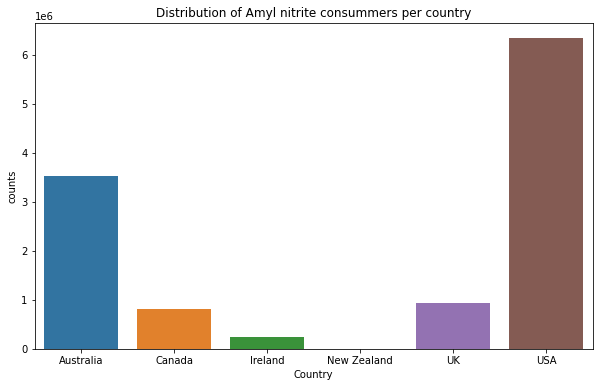

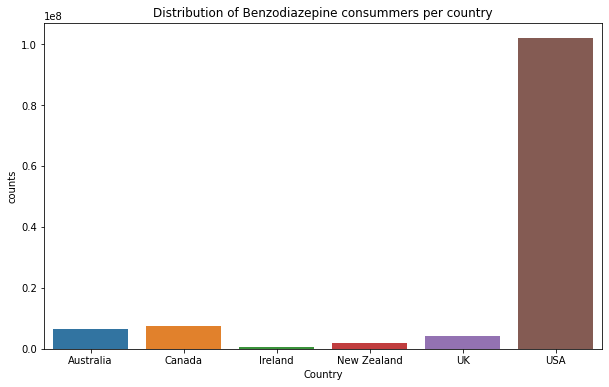

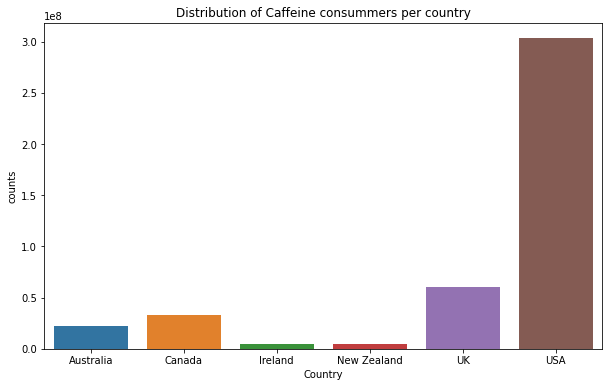

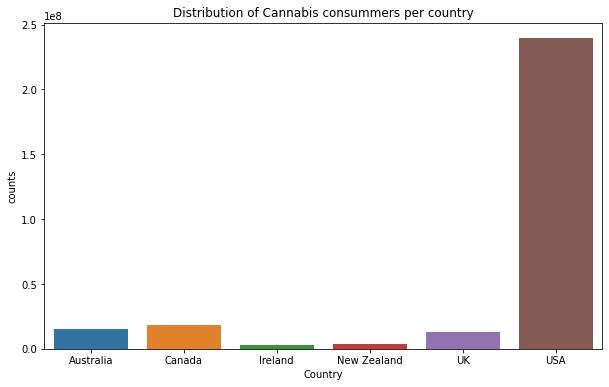

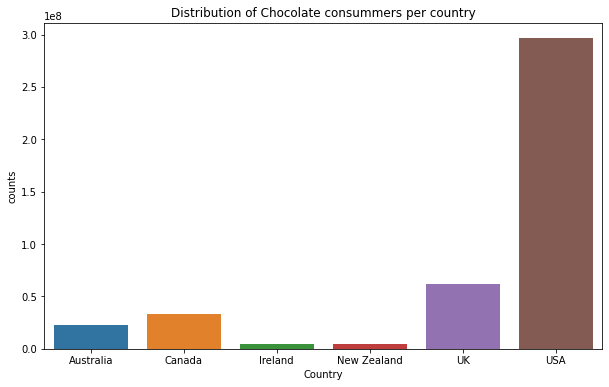

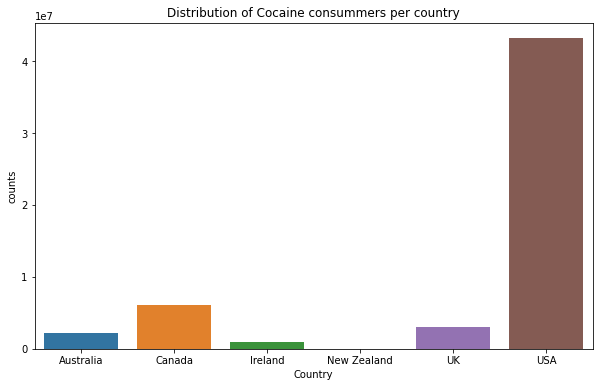

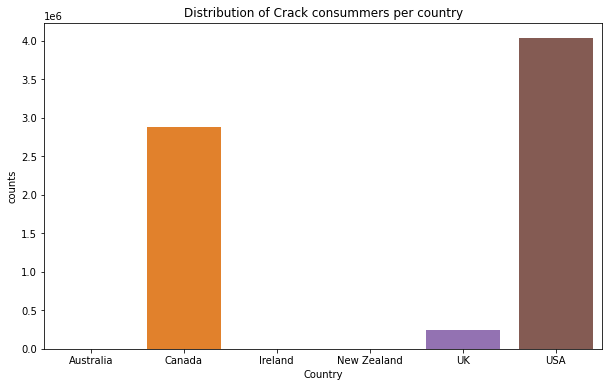

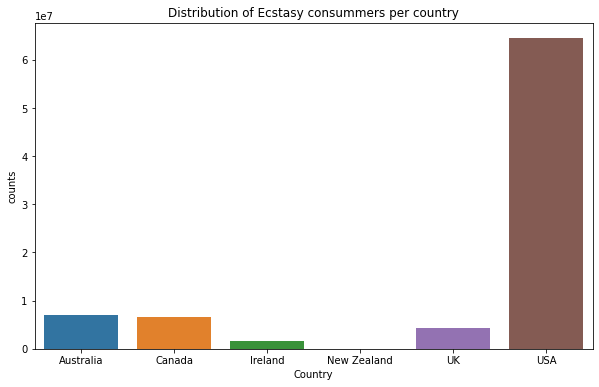

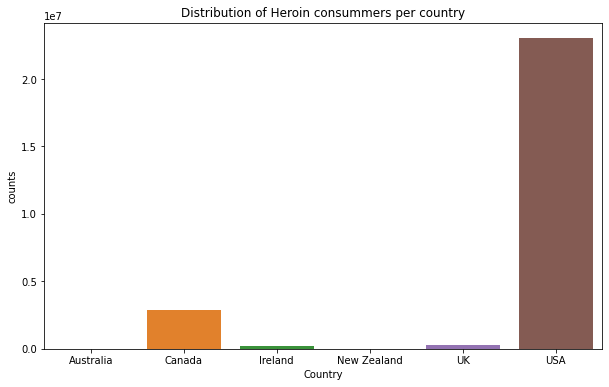

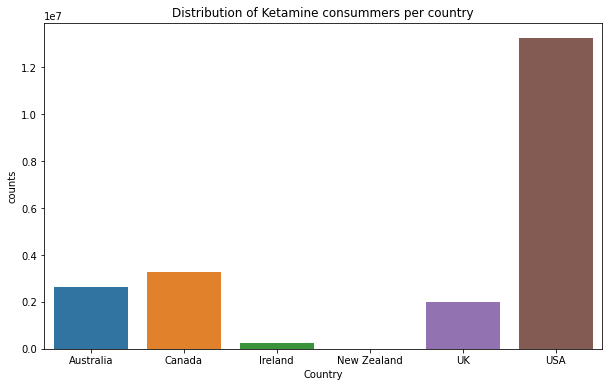

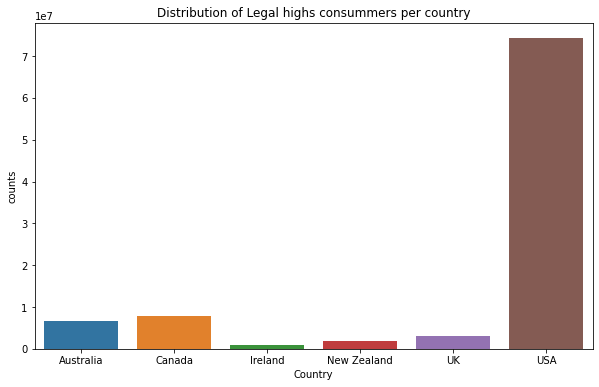

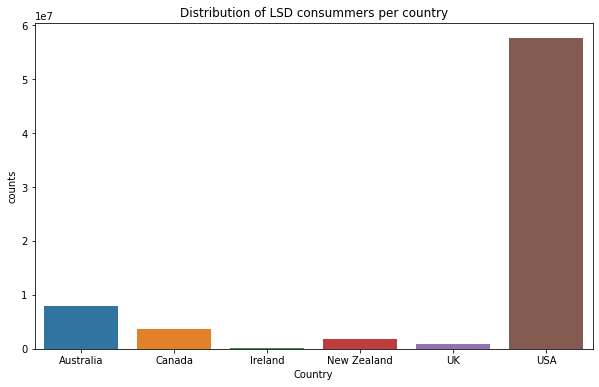

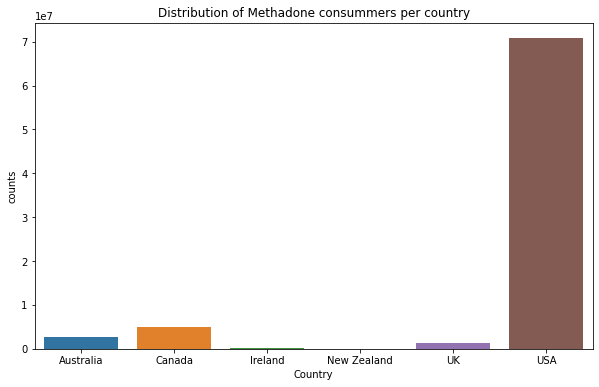

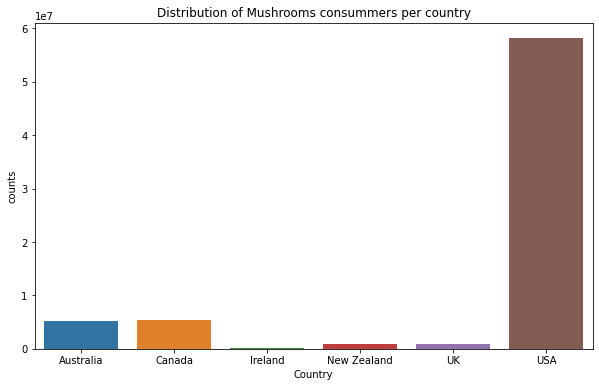

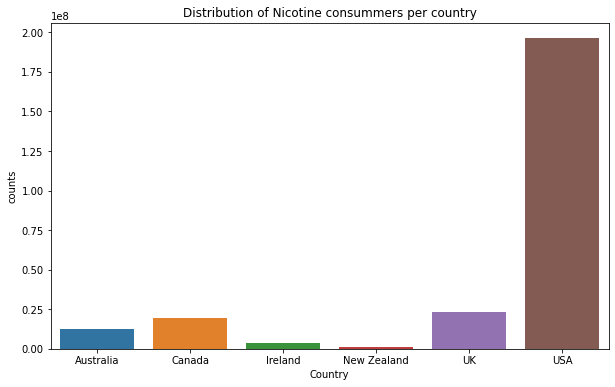

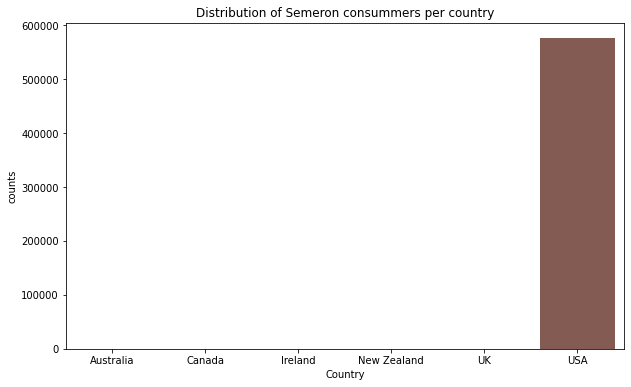

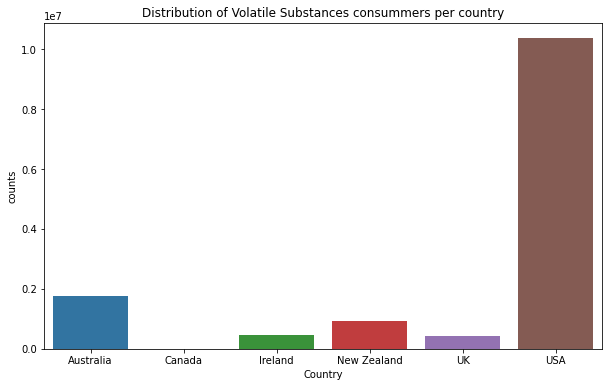

In [14]:
for substance in dataset.iloc[:,11:31].columns.tolist():
    subs_addict = data_country[data_country[substance].isin(["CL6", "CL5", "CL4"])]
    country_plot = subs_addict.groupby(['Country']).size().reset_index(name='counts')
    for _ in country_plot.index:
        country = country_plot.iloc[_,0]
        country_plot['counts'].iloc[_] *= pop_multiplicator[country]
    plt.rcParams['figure.figsize'] = [10, 6]
    sns.barplot(x='Country', y='counts', data=country_plot, order = ["Australia", "Canada",
                                                                     "Ireland", "New Zealand", "UK", "USA"]
               ).set_title(f"Distribution of {substance} consummers per country")
    plt.show()

Let's take the example of the Alcohol. According to the first plot we generated, thanks to our data, we should have around $0.6 * 10^8$ people consuming alcohol at least once in a month, that is 60 000 000 which represents 92% of the UK citizen drinking at least once a month. After a few research, we can see [here](https://www.drinkaware.co.uk/research/research-and-evaluation-reports/alcohol-consumption-uk "drinkaware.co.uk") :
>In Great Britain in 2017, one-fifth (20%) of adults aged 16 and over said that they do not drink alcohol.

Against the 8% we found, we can assume that our data are not representatives.

Let's conclude this part by trying to figure out which drug is the more addictive. To do so, we will look at the number of people consumming each drug and will be looking for drug where there are few occasional consummers and numerous frequent consummers .

In [15]:
drug_addiction = dataset.iloc[:,11:31].replace(['CL0', 'CL1'],
                                               'Not consumer').replace(['CL2', 'CL3'],
                                                                       'Once consumed').replace(['CL4', 'CL5', 'CL6']
                                                                                                ,'Regular consumer')
drug_addiction.apply(pd.value_counts).sort_index(ascending=False).sort_values(by="Regular consumer", axis=1, ascending=False)

,Chocolate,Caffeine,Alcohol,Nicotine,Cannabis,Benzodiazepine,Legal highs,Ecstasy,Amphetamines,Methadone,LSD,Cocaine,Mushrooms,Ketamine,Heroin,Amyl nitrite,Volatile Substances,Crack,Semeron
Regular consumer,1786,1764,1551,875,788,299,241,240,238,171,166,159,159,79,53,41,34,20,1
Once consumed,64,84,266,389,477,470,521,511,441,246,391,528,535,271,159,329,196,171,5
Not consumer,35,37,68,621,620,1116,1123,1134,1206,1468,1328,1198,1191,1535,1673,1515,1655,1694,1879


What we did here is we isolated the columns with the drug consumption and replaced the categorical values CL0, CL1, ... with new value much clearer. If the subject consumed the product within the past month, then we consider him a regular user. If he consumed it in in the last decade, we consider him a once consumer. Otherwise, we consider that he never consumed it.
And then, we counted the number of each category for each drug and sorted the results in order to have the drug that are the more addtictive to the less addictive.

# Modelisation

## Preprocessing

Let's try to produce a model that is good at predicting the output of the column 'Heroin'. This is an arbitrary choice.

In [16]:
from sklearn.preprocessing   import OneHotEncoder
training_encoder = OneHotEncoder(handle_unknown='ignore')
X = dataset.iloc[:,0:11]
Y = dataset['Heroin']
X = pd.DataFrame(training_encoder.fit_transform(X).toarray())

## Modeling

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [18]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)
Y_pred = model1.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8771186440677966

Nearly 85% that's a good result. We choose a RandomForestClassifier arbitrary but it looks like it's a good modelisation. Let's try to move to another column of our dataframe.

In [20]:
Y = dataset['Cannabis']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

### Random Forest :

In [21]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train, Y_train)
Y_RF = model2.predict(X_test)

In [22]:
accuracy_score(Y_test, Y_RF)

0.4110169491525424

### Decision Tree :

In [23]:
from sklearn import tree
model3 = tree.DecisionTreeClassifier()
model3.fit(X_train, Y_train)
Y_tree = model3.predict(X_test)

In [24]:
accuracy_score(Y_test, Y_tree)

0.3135593220338983

### Naive Bayesian classifier :

In [29]:
from sklearn.naive_bayes import GaussianNB
modelNB = GaussianNB()
modelNB.fit(X_train, Y_train)
Y_NB = modelNB.predict(X_test)

In [30]:
accuracy_score(Y_test, Y_NB)

0.1419491525423729

### KNN Classifier :

In [31]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, Y_train)
Y_KNN = modelKNN.predict(X_test)

In [32]:
accuracy_score(Y_test, Y_KNN)

0.3156779661016949

### Ada Boost :

In [33]:
from sklearn.ensemble import AdaBoostClassifier
modelAB = AdaBoostClassifier()
modelAB.fit(X_train, Y_train)
Y_AB = modelAB.predict(X_test)

In [34]:
accuracy_score(Y_test, Y_AB)

0.3029661016949153

### Gradient boosting :

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
modelGB = GradientBoostingClassifier()
modelGB.fit(X_train, Y_train)
Y_GB = modelGB.predict(X_test)

In [36]:
accuracy_score(Y_test, Y_GB)

0.3411016949152542

### Support vector :

In [37]:
from sklearn.svm import SVC
modelSVM = SVC()
modelSVM.fit(X_train, Y_train)
Y_SVM = modelSVM.predict(X_test)

In [38]:
accuracy_score(Y_test, Y_SVM)

0.4046610169491525

Both the support vector classification and the random forrest classification scored great comparing to the other classifiers.

### Grid search :

In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
grid = GridSearchCV(SVC(), param_grid, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

0.3892288800340826 SVC(C=10, gamma=0.001)


In [40]:
parameters = {
    "n_estimators" : [10, 100, 500],
    "min_samples_leaf": [  3,   1,   7 ],
    "criterion" : ['giny', 'entropy']
}
grid_RF = GridSearchCV(RandomForestClassifier(), parameters, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

0.3892288800340826 SVC(C=10, gamma=0.001)


We see here that we struggle to get a more accurate model. Probably because unlike the heroin model we did above, the profile of cannabis smoker is more diverse.

# Saving the model
We decide to save the model that predicts the consumption of heroin as its accuracy is 85% which is really good. We'll use it in our API.

In [106]:
import pickle
pickle.dump(model1, open('./heroin_model.pickle', 'wb'))

Furthermore, to generate data that our model in the resting API is able to process, we have to pass him data that are encoded. Let's do two examples :

In [107]:
import pickle
API_data_example = training_encoder.transform([["18-24", 'H', 'Masters degree', 'USA', -3.464360, 0.63779, 0.44585, -0.15487, -0.40581, -0.71126
, 0.7654]]).toarray()
pickle.dump(API_data_example, open('./API_data_example.pickle', 'wb'))

The first one is generated from arbitrary values when the second one is giving random values to each features.

In [108]:
import pickle
import random as rd
resp=[]
for col in dataset.iloc[:, 0:11].columns:
    values = dataset[col].unique()
    resp.append(rd.choice(values))
API_data_random = training_encoder.transform([resp]).toarray()
pickle.dump(API_data_random, open('./API_data_random.pickle', 'wb'))